# Exercises

### Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [7]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns

import wrangle

import warnings
warnings.filterwarnings("ignore")

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

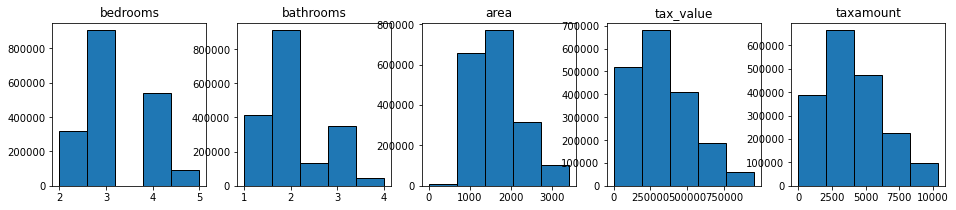

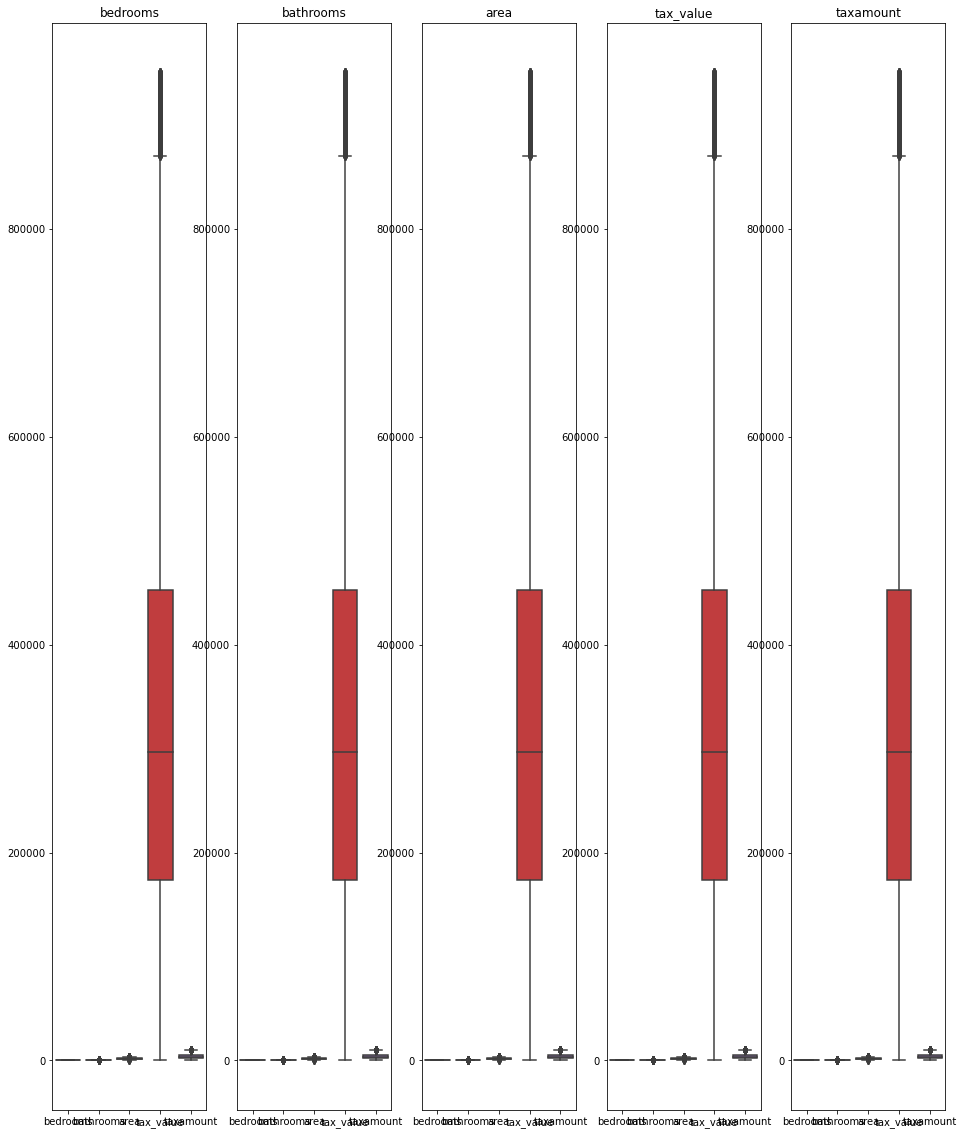

In [4]:
# Getting data from wrangle and visualization without scaling
train, validate, test = wrangle.wrangle_zillow()

In [5]:
train.shape, validate.shape, test.shape

((1038399, 7), (445029, 7), (370858, 7))

In [6]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
537465,3,2.5,1971.0,383099.0,1987,3895.40,6059.0
554109,4,2.0,1878.0,396577.0,1959,4952.22,6037.0
307369,2,2.0,1001.0,209965.0,1949,2528.27,6037.0
1311282,3,2.0,1474.0,63182.0,1955,1032.70,6059.0
1755945,3,2.0,1221.0,260804.0,1951,3364.06,6037.0


In [8]:
# 1. create the object / Define the scalar

scaler = sklearn.preprocessing.MinMaxScaler()

In [9]:
# 2. fit the object (learn the min and max value)
# Calculatin min and max and storing in scalar only on train
scalar = scaler.fit(train[['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']])

In [10]:
# Transform
scaled_train = scalar.transform(train[['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']])
scaled_train

array([[0.33333333, 0.5       , 0.57822131, 0.40289415, 0.37439289],
       [0.66666667, 0.33333333, 0.55092457, 0.41706939, 0.47639703],
       [0.        , 0.33333333, 0.29351335, 0.22080367, 0.24243767],
       ...,
       [0.33333333, 0.33333333, 0.41561491, 0.39172897, 0.43171122],
       [0.33333333, 0.33333333, 0.31141767, 0.22193113, 0.2533087 ],
       [0.33333333, 0.33333333, 0.39477546, 0.57434743, 0.43268511]])

In [11]:
train.shape, scaled_train.shape

((1038399, 7), (1038399, 5))

In [16]:
# Converts array to DataFrames
scaled_train_df = pd.DataFrame(scaled_train, index = train.index, columns = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount'])
scaled_train_df.head()

,bedrooms,bathrooms,area,tax_value,taxamount
537465,0.333333,0.500000,0.578221,0.402894,0.374393
554109,0.666667,0.333333,0.550925,0.417069,0.476397
307369,0.000000,0.333333,0.293513,0.220804,0.242438
1311282,0.333333,0.333333,0.432345,0.066427,0.098085
1755945,0.333333,0.333333,0.358086,0.274273,0.323108


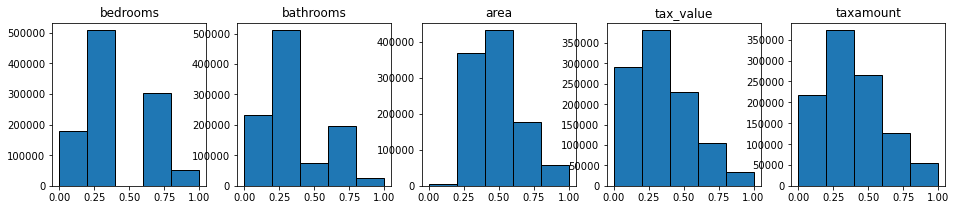

In [18]:
# Histogram of scaled_train_df
wrangle.get_histogram(scaled_train_df)

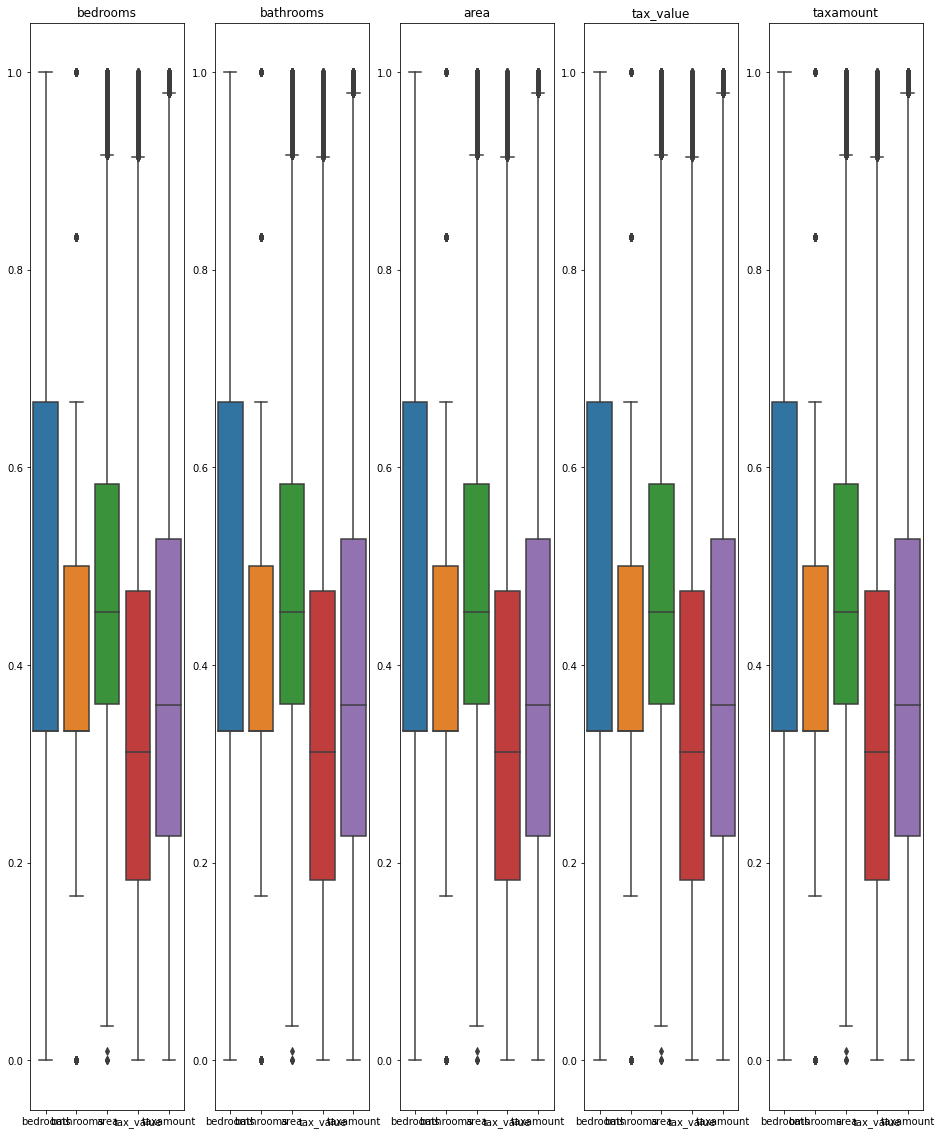

In [19]:
# Boxplot of scaled_train_df
wrangle.get_boxplot(scaled_train_df)

Text(0, 0.5, 'Scaled Bedrooms')

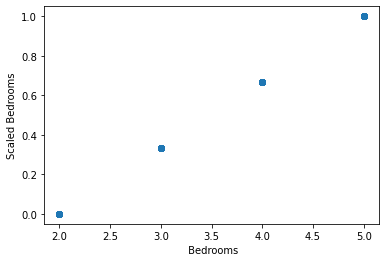

In [22]:
# plot bedrooms vs scaled bedrooms
plt.scatter(train.bedrooms, scaled_train_df.bedrooms)
plt.xlabel(' Bedrooms')
plt.ylabel('Scaled Bedrooms')

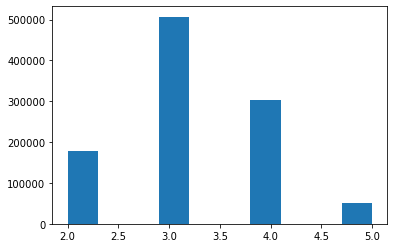

In [24]:
# plot distribution of bedrooms
plt.hist(train.bedrooms);

(array([179007.,      0.,      0., 507035.,      0.,      0., 302386.,
             0.,      0.,  49971.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

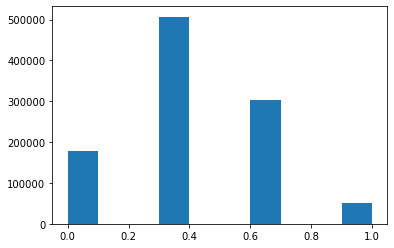

In [25]:
# plot distribution of scaled bedrooms
plt.hist(scaled_train_df.bedrooms)

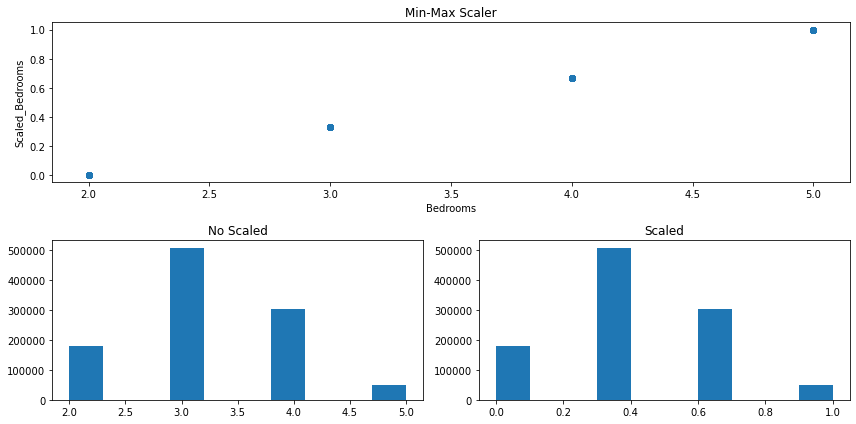

In [41]:
# plot all three charts above in a single figure
fig = plt.figure(figsize = (12,6))

gs = plt.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax1.scatter(train.bedrooms, scaled_train_df.bedrooms)
ax1.set(xlabel = 'Bedrooms', ylabel = 'Scaled_Bedrooms', title = 'Min-Max Scaler')

ax2.hist(train.bedrooms)
ax2.set(title = 'No Scaled')

ax3.hist(scaled_train_df.bedrooms)
ax3.set(title = 'Scaled')
plt.tight_layout();

In [42]:
# This function will help us visualize the attributes easily
def visualize_scaled_non_scaled(scalar, scalar_name, train, feature):
    scaled = scalar.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled_train_df.bedrooms)
    ax1.set(xlabel = feature, ylabel = 'Scaled_'+feature, title = scalar_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'No Scaled')

    ax3.hist(scaled_train_df.bedrooms)
    ax3.set(title = 'Scaled')
    plt.tight_layout();



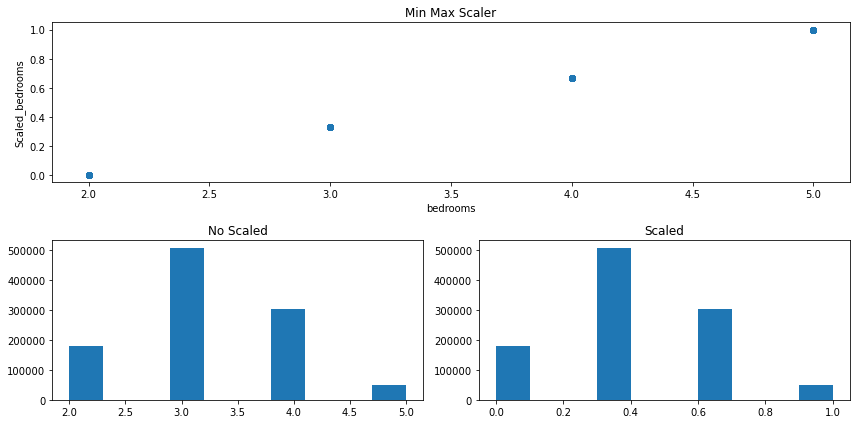

In [43]:
# Use the function created above for bathrooms
visualize_scaled_non_scaled(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', train, 'bedrooms')

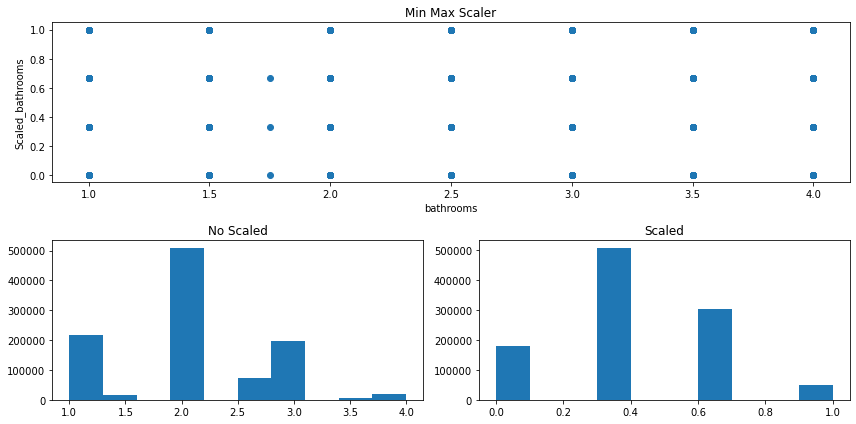

In [44]:
# Use the function created above for bedrooms
visualize_scaled_non_scaled(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', train, 'bathrooms')

In [45]:
train.head(1)

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
537465,3,2.5,1971.0,383099.0,1987,3895.4,6059.0


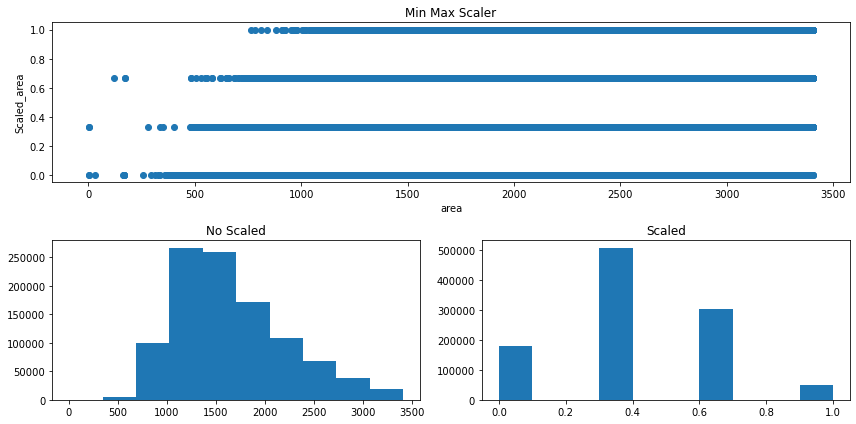

In [46]:
# Use the function created above for bedrooms
visualize_scaled_non_scaled(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', train, 'area')

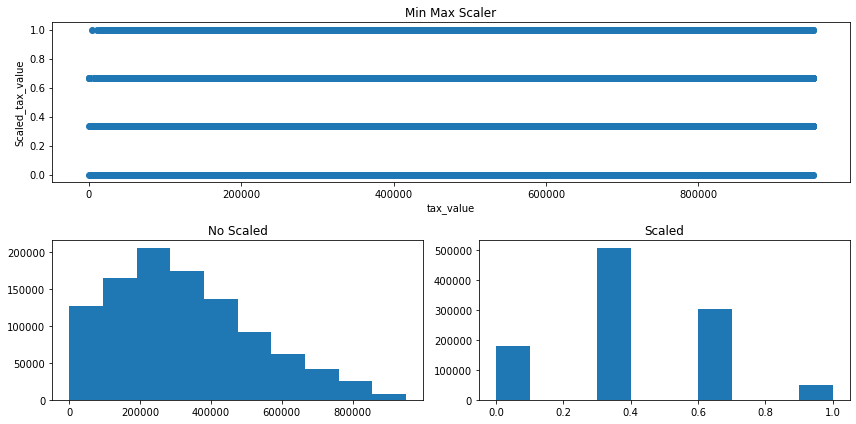

In [47]:
# Use the function created above for bedrooms
visualize_scaled_non_scaled(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', train, 'tax_value')

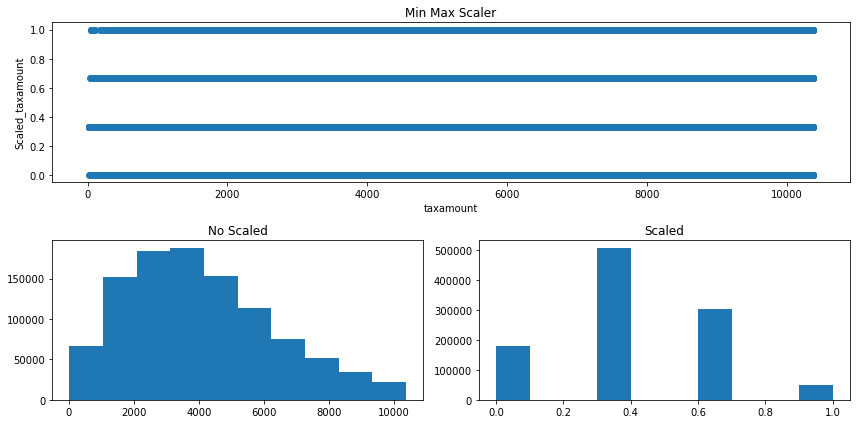

In [48]:
# Use the function created above for bedrooms
visualize_scaled_non_scaled(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', train, 'taxamount')

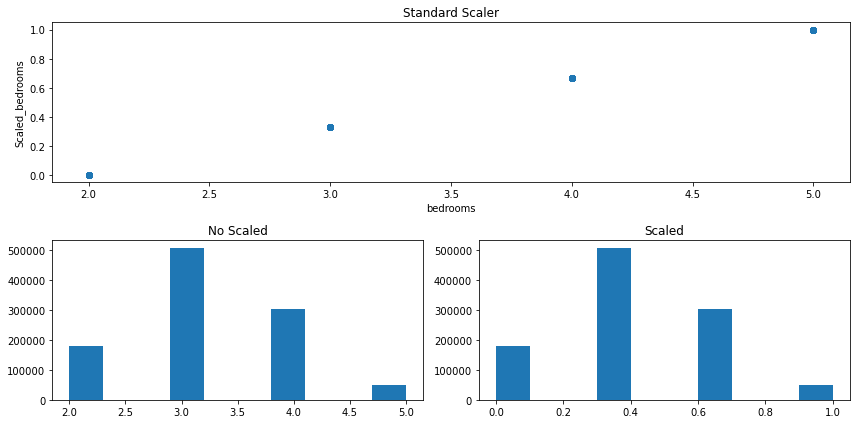

In [76]:
# visualize scaling for bedrooms using Standard Scalar

visualize_scaled_non_scaled(sklearn.preprocessing.StandardScaler(), 'Standard Scaler',train, 'bedrooms')

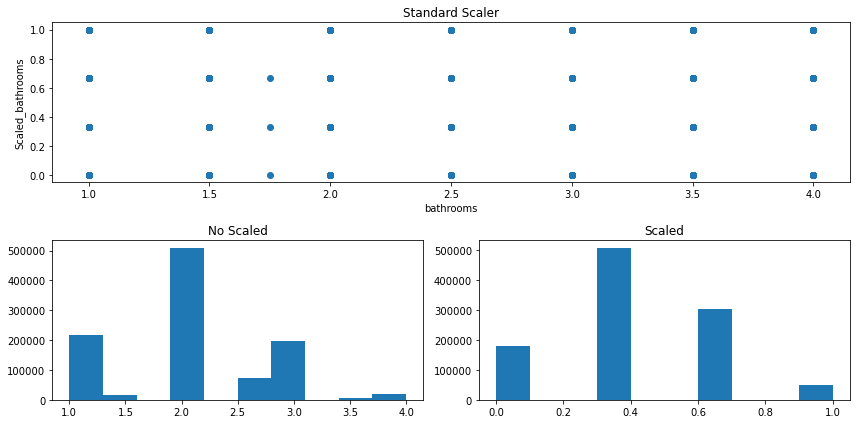

In [78]:
# visualize scaling for bathrooms using  Standard Scaler

visualize_scaled_non_scaled(sklearn.preprocessing.StandardScaler(), 'Standard Scaler',train, 'bathrooms')

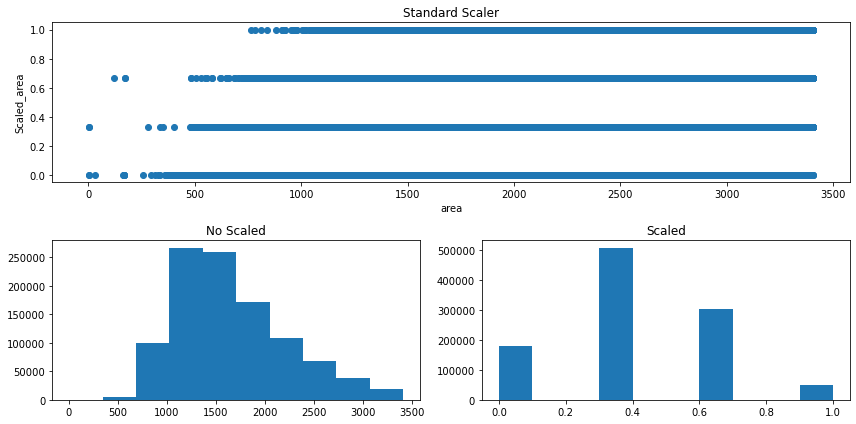

In [79]:
# visualize scaling for area using Standard Scaler

visualize_scaled_non_scaled(sklearn.preprocessing.StandardScaler(), 'Standard Scaler',train, 'area')

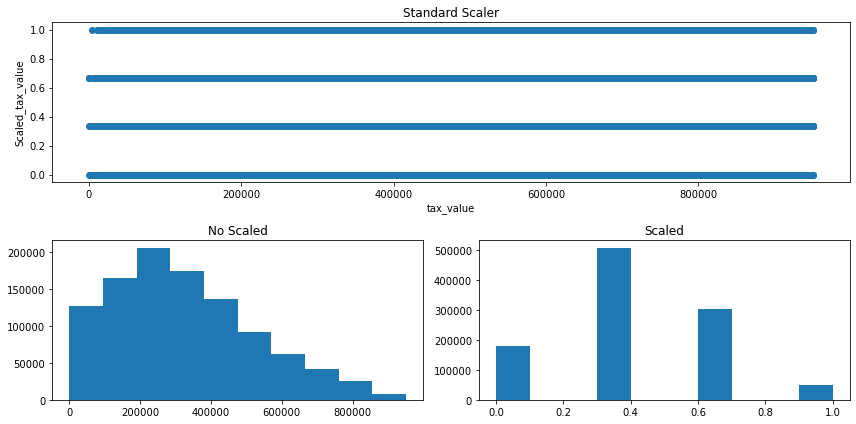

In [80]:
# visualize scaling for tax_value using Standard Scaler

visualize_scaled_non_scaled(sklearn.preprocessing.StandardScaler(), 'Standard Scaler',train, 'tax_value')

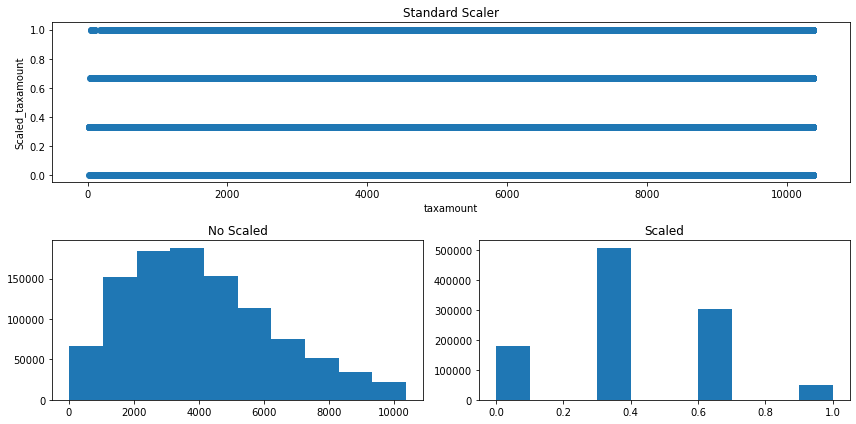

In [81]:
# visualize scaling for taxamount using Standard Scaler

visualize_scaled_non_scaled(sklearn.preprocessing.StandardScaler(), 'Standard Scaler',train, 'taxamount')

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [49]:
scaled_train_df.head()

,bedrooms,bathrooms,area,tax_value,taxamount
537465,0.333333,0.500000,0.578221,0.402894,0.374393
554109,0.666667,0.333333,0.550925,0.417069,0.476397
307369,0.000000,0.333333,0.293513,0.220804,0.242438
1311282,0.333333,0.333333,0.432345,0.066427,0.098085
1755945,0.333333,0.333333,0.358086,0.274273,0.323108
...,...,...,...,...,...
853015,0.333333,0.333333,0.335192,0.073300,0.145710
1149341,1.000000,0.500000,0.759319,0.882150,0.904053
328656,0.333333,0.333333,0.415615,0.391729,0.431711
1468060,0.333333,0.333333,0.311418,0.221931,0.253309


In [51]:
# Using inverse function to transform scaled to non scale data
scalar.inverse_transform(scaled_train_df)


array([[3.00000e+00, 2.50000e+00, 1.97100e+03, 3.83099e+05, 3.89540e+03],
       [4.00000e+00, 2.00000e+00, 1.87800e+03, 3.96577e+05, 4.95222e+03],
       [2.00000e+00, 2.00000e+00, 1.00100e+03, 2.09965e+05, 2.52827e+03],
       ...,
       [3.00000e+00, 2.00000e+00, 1.41700e+03, 3.72483e+05, 4.48925e+03],
       [3.00000e+00, 2.00000e+00, 1.06200e+03, 2.11037e+05, 2.64090e+03],
       [3.00000e+00, 2.00000e+00, 1.34600e+03, 5.46119e+05, 4.49934e+03]])

In [52]:
# Converting array to a dataframe
unscaled_df = pd.DataFrame(scalar.inverse_transform(scaled_train_df), index = train.index, columns = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount'])

In [53]:
unscaled_df

,bedrooms,bathrooms,area,tax_value,taxamount
537465,3.0,2.5,1971.0,383099.0,3895.40
554109,4.0,2.0,1878.0,396577.0,4952.22
307369,2.0,2.0,1001.0,209965.0,2528.27
1311282,3.0,2.0,1474.0,63182.0,1032.70
1755945,3.0,2.0,1221.0,260804.0,3364.06
...,...,...,...,...,...
853015,3.0,2.0,1143.0,69717.0,1526.12
1149341,5.0,2.5,2588.0,838782.0,9382.98
328656,3.0,2.0,1417.0,372483.0,4489.25
1468060,3.0,2.0,1062.0,211037.0,2640.90


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

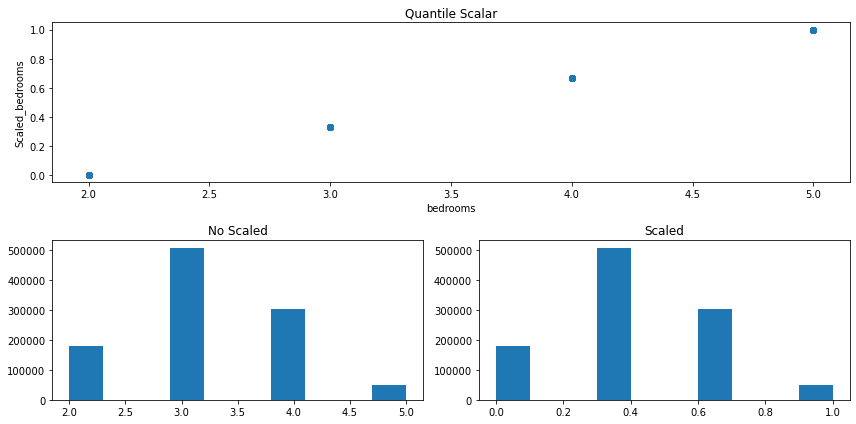

In [58]:
# Visualize bedrooms quantile transformations with output_distribution = 'normal'
visualize_scaled_non_scaled(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scalar', train, 'bedrooms')

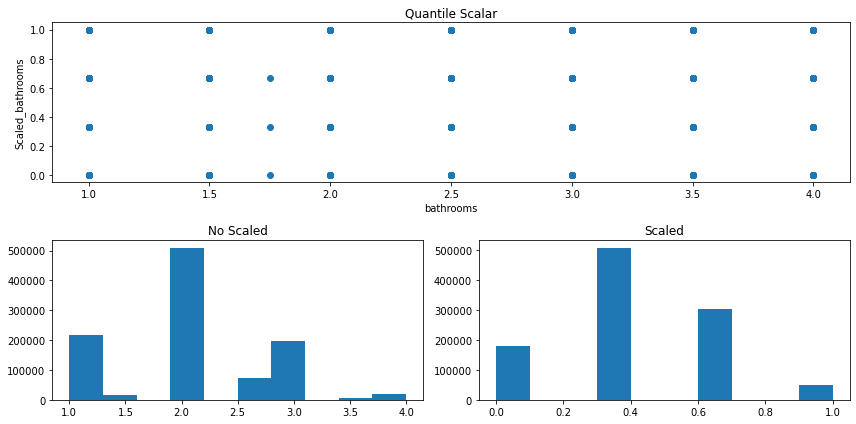

In [59]:
visualize_scaled_non_scaled(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scalar', train, 'bathrooms')

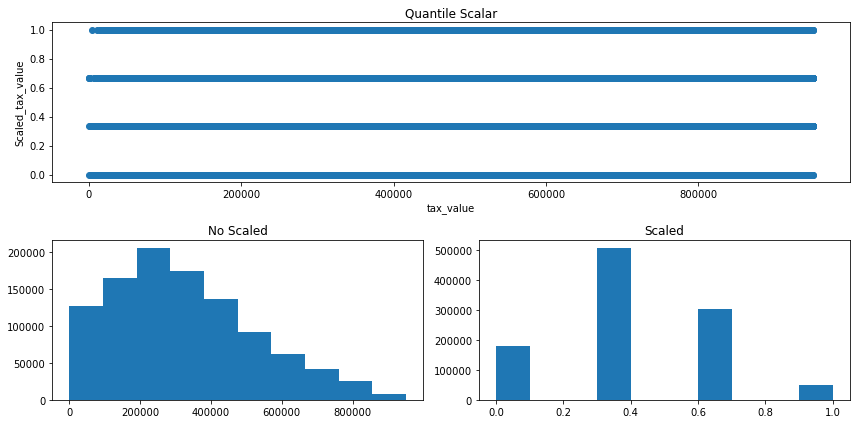

In [60]:
visualize_scaled_non_scaled(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scalar', train, 'tax_value')

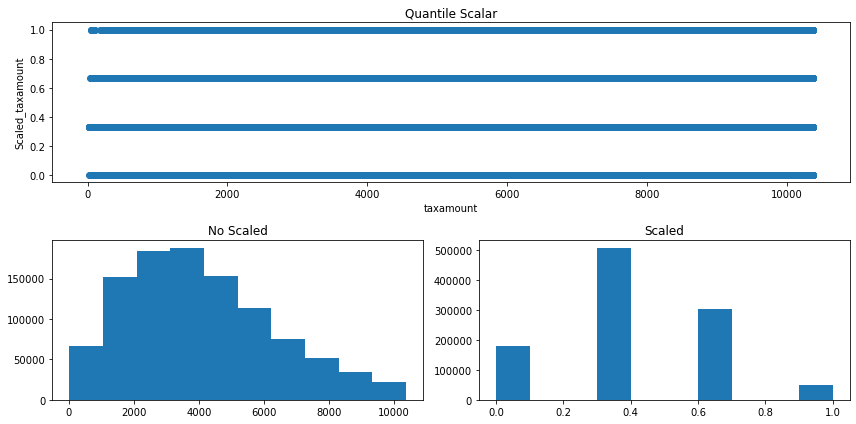

In [61]:
# taxamount
visualize_scaled_non_scaled(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scalar', train, 'taxamount')

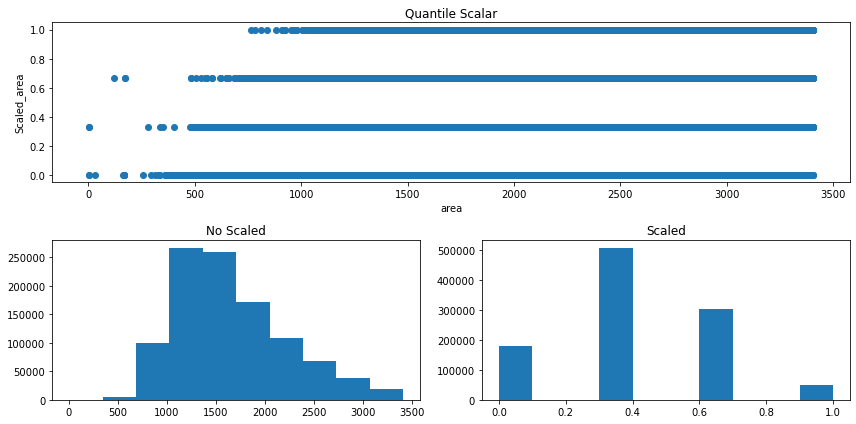

In [63]:
# Area
visualize_scaled_non_scaled(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scalar', train, 'area')

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

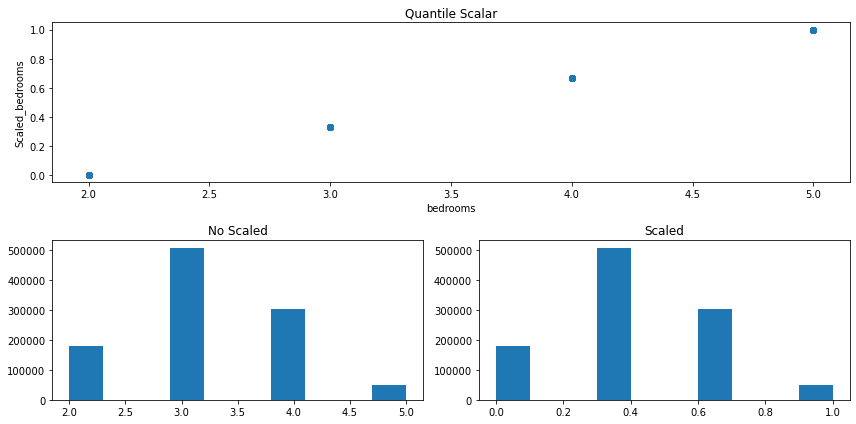

In [68]:
# Visualize bedrooms quantile transformations without output_distribution = 'normal'
visualize_scaled_non_scaled(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scalar', train, 'bedrooms')

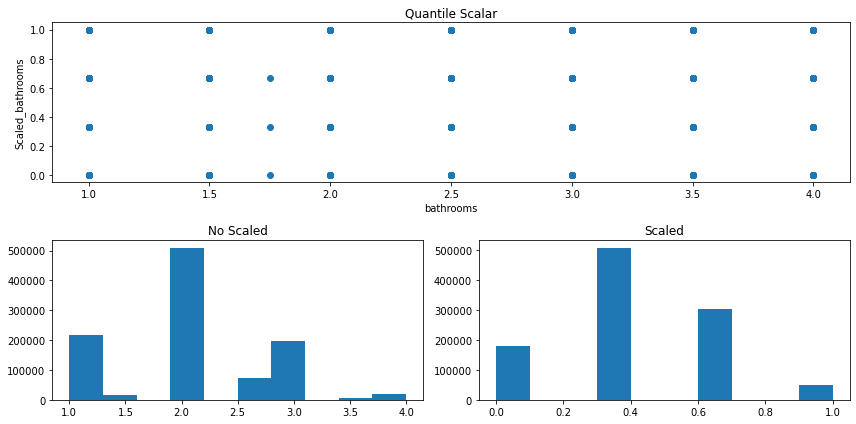

In [69]:
# Visualize bathrooms quantile transformations without output_distribution = 'normal'
visualize_scaled_non_scaled(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scalar', train, 'bathrooms')

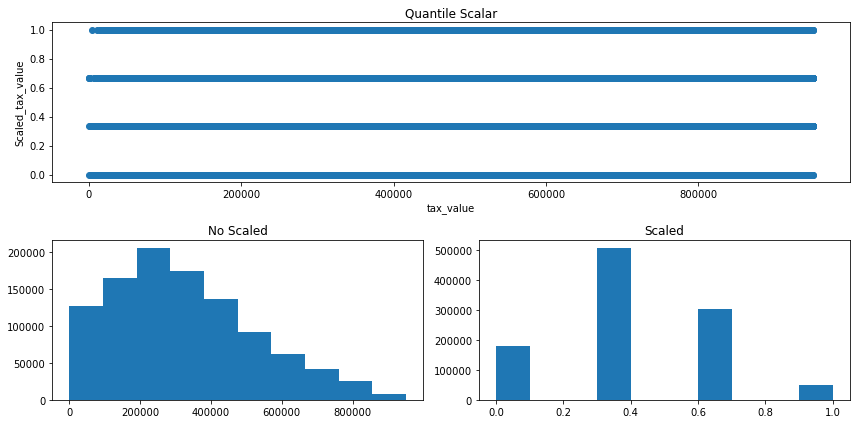

In [73]:
# Visualize tax_value quantile transformations without output_distribution = 'normal'
visualize_scaled_non_scaled(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scalar', train, 'tax_value')

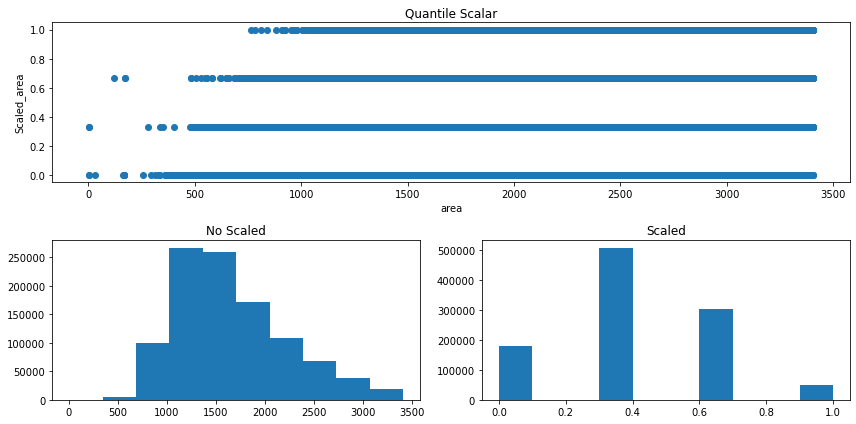

In [71]:
# Visualize area quantile transformations without output_distribution = 'normal'
visualize_scaled_non_scaled(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scalar', train, 'area')

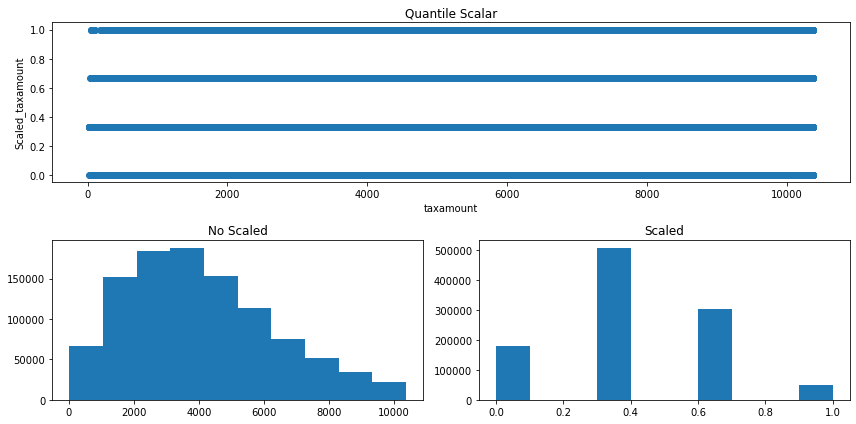

In [74]:
# Visualize taxamount quantile transformations without output_distribution = 'normal'
visualize_scaled_non_scaled(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scalar', train, 'taxamount')

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [86]:
def Standard_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """

    scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [87]:
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [ ]:
def RobustScalar(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = sklearn.preprocessing.RobustScaler()
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(x_train)

    X_train_scaled = scaler.transform(x_train)
    X_validate_scaled = scaler.transform(x_validate)
    X_test_scaled = scaler.transform(x_test)
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [88]:
X_train = train[['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']]
X_validate = validate[['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']]
X_test = test[['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']]

In [89]:
# Use the Standard_Scaler Function defined above

scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Standard_Scaler(X_train, X_validate, X_test)

X_train_scaled.head()

,bedrooms,bathrooms,area,tax_value,taxamount
537465,-0.275398,0.631633,0.563909,0.278310,-0.076966
554109,1.005148,-0.075403,0.398948,0.346114,0.394678
307369,-1.555943,-0.075403,-1.156653,-0.592688,-0.687096
1311282,-0.275398,-0.075403,-0.317657,-1.331119,-1.354547
1755945,-0.275398,-0.075403,-0.766422,-0.336928,-0.314095


In [90]:
# Use the Min_Max_Scaler Function defined above

scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler(X_train, X_validate, X_test)

X_train_scaled.head()

,bedrooms,bathrooms,area,tax_value,taxamount
537465,0.333333,0.500000,0.578221,0.402894,0.374393
554109,0.666667,0.333333,0.550925,0.417069,0.476397
307369,0.000000,0.333333,0.293513,0.220804,0.242438
1311282,0.333333,0.333333,0.432345,0.066427,0.098085
1755945,0.333333,0.333333,0.358086,0.274273,0.323108
